In [1]:
# Import necessary libraries
# Your calling code (e.g., in a script or notebook)

from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
# Now access functions using the alias:
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
# df = load_dataset('country_co2_emissions')
df = load_dataset('pairfam_family')

# Show the dataframe
df

Available datasets in Sequenzo:  ['country_co2_emissions_local_quintiles', 'country_co2_emissions_local_deciles', 'polyadic_seqc1', 'polyadic_samplep1', 'mvad', 'chinese_colonial_territories', 'polyadic_samplec1', 'country_gdp_per_capita', 'polyadic_seqp1', 'country_co2_emissions', 'biofam_married_domain', 'country_co2_emissions_global_deciles', 'country_co2_emissions_global_quintiles', 'biofam', 'pairfam_family', 'biofam_left_domain', 'biofam_child_domain']


,id,weight40,sex,doby_gen,dob,ethni,migstatus,yeduc,sat1i4,sat5,...,255,256,257,258,259,260,261,262,263,264
0,111000.0,0.343964,1,1971,855,1,1,11.5,5,7,...,4,4,4,4,4,4,4,4,4,4
1,1624000.0,1.467063,1,1973,880,1,1,11.5,9,8,...,8,8,8,8,8,8,8,8,8,8
2,2767000.0,0.463918,1,1971,853,1,1,9.0,9,-2,...,8,8,8,8,8,8,8,8,8,8
3,2931000.0,1.767455,0,1973,881,5,3,10.5,5,5,...,9,9,9,9,9,9,9,9,9,9
4,3167000.0,0.884521,1,1973,883,1,1,11.5,8,10,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,919347000.0,0.964979,0,1973,880,1,1,11.5,8,4,...,1,1,1,1,1,1,1,1,1,1
1862,919488000.0,1.981277,0,1971,863,1,1,10.5,10,2,...,9,9,9,9,9,9,9,9,9,9
1863,919910000.0,0.485150,1,1973,878,1,1,20.0,7,7,...,8,8,8,8,8,8,8,8,8,8
1864,920140000.0,2.022823,0,1971,859,1,1,11.5,10,10,...,7,7,7,7,7,7,7,7,7,7


In [2]:
# Define time span: 264 months (e.g., 1 ... 264)
time_list = [f"{i}" for i in range(1, 265)]

# Define 9 states (numeric codes 1–9)
states = list(range(1, 10))

# Define labels for each state
labels = [
    "Single, no child",
    "Living apart together, no child",
    "Cohabiting, no child",
    "Married, no child",
    "Single, with child(ren)",
    "LAT, with child(ren)",
    "Cohabiting, with child(ren)",
    "Married, 1 child",
    "Married, 2+ children"
]

colors = [
    "#74C9B4",  # 青翠色（山间新绿）
    "#A6E3D0",  # 水绿（溪水清波）
    "#F9E79F",  # 杏黄（阳光轻照）
    "#F6CDA3",  # 橙杏色（晚霞暖色）
    "#F5B7B1",  # 粉黛色（桃花春风）
    "#D7BDE2",  # 淡紫（兰花幽香）
    "#A3C4F3",  # 天青色（青花瓷釉）
    "#7FB3D5",  # 碧蓝（江天一色）
    "#EAECEE"   # 云白（轻雾朦胧）
]



# Initialize SequenceData object
sequence_data = SequenceData(
    df,
    time=time_list,
    id_col="id",   # your dataset has column "id", not "country"
    states=states,
    labels=labels,
    weights=df['weight40'].values,  # Extract the weight column values
    custom_colors=colors
)



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1866
[>] Number of time points: 264
[>] Min/Max sequence length: 264 / 264
[>] States: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[>] Labels: ['Single, no child', 'Living apart together, no child', 'Cohabiting, no child', 'Married, no child', 'Single, with child(ren)', 'LAT, with child(ren)', 'Cohabiting, with child(ren)', 'Married, 1 child', 'Married, 2+ children']
[>] Weights: Provided (total weight=2346.268, mean=1.257, std=1.046)


         id  time  begin  spell_time  transition                      s.1  \
0  111000.0     1      1           0       False  Single, with child(ren)   
1  111000.0     2      1           1       False  Single, with child(ren)   
2  111000.0     3      1           2       False  Single, with child(ren)   
3  111000.0     4      1           3       False  Single, with child(ren)   
4  111000.0     5      1           4       False  Single, with child(ren)   

                       s.2                      s.3 typology  
0  Single, with child(ren)  Single, with child(ren)     None  
1  Single, with child(ren)  Single, with child(ren)     None  
2  Single, with child(ren)  Single, with child(ren)     None  
3  Single, with child(ren)  Single, with child(ren)     None  
4  Single, with child(ren)  Single, with child(ren)     None  


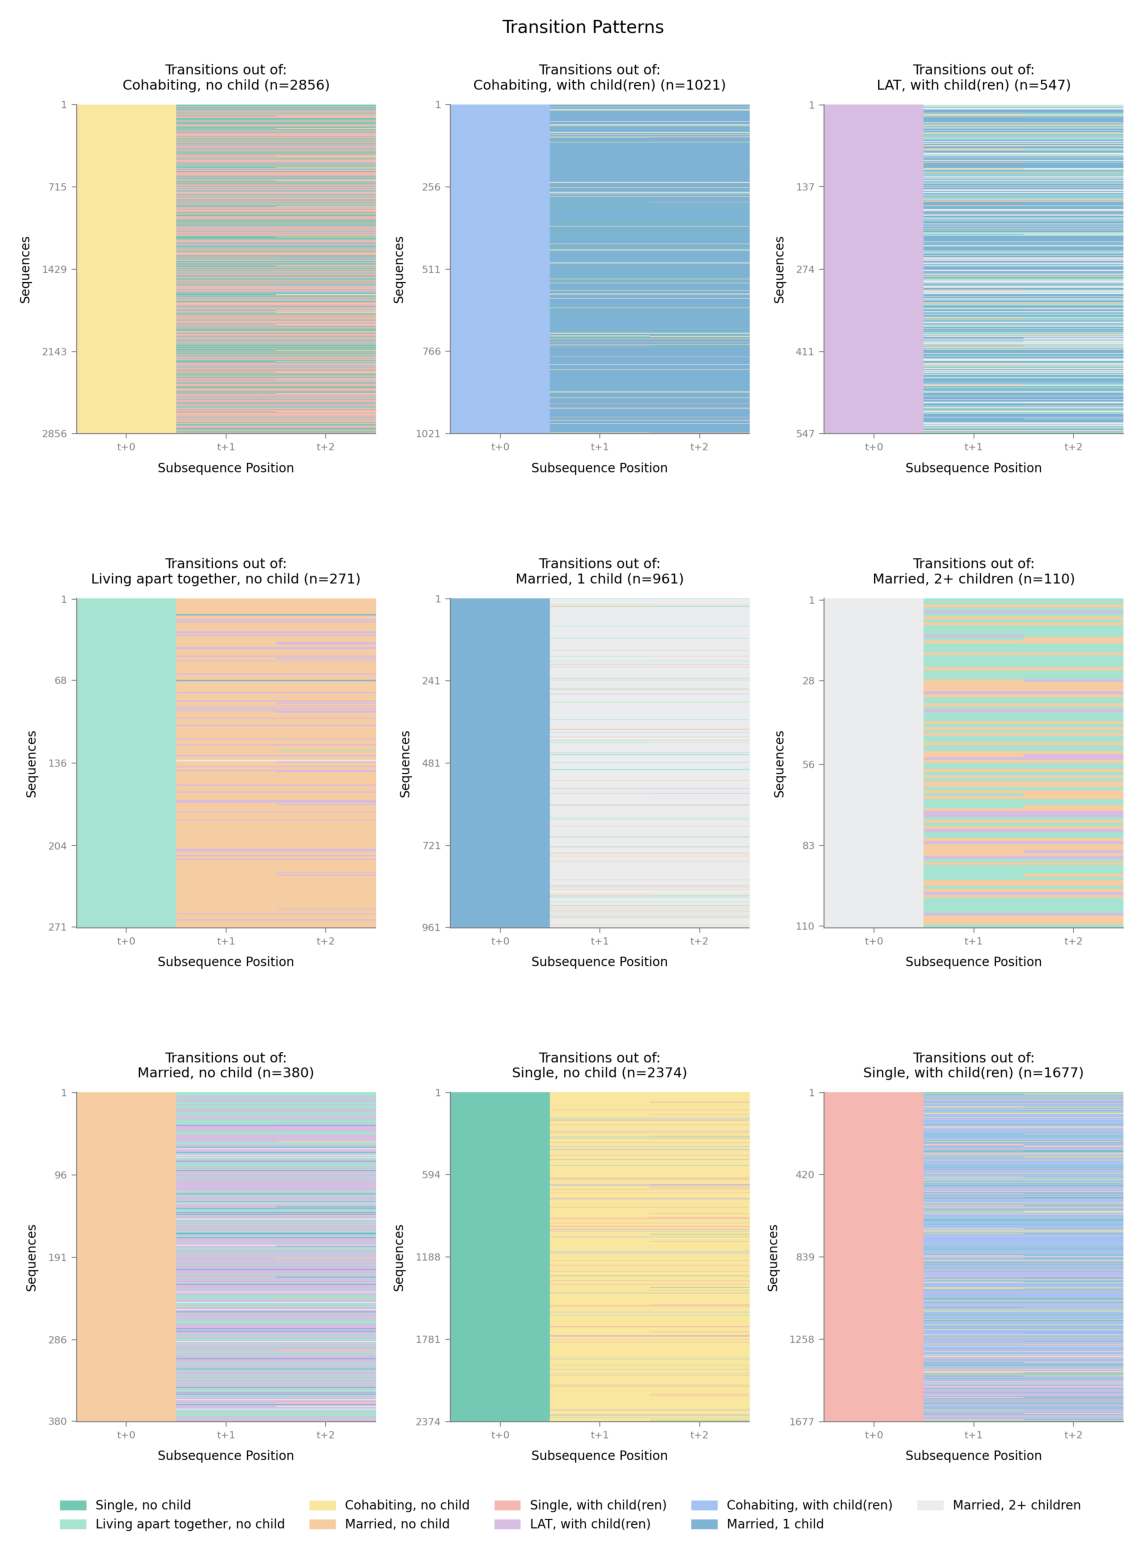

In [3]:
# Create SAMM object
samm_obj = sequence_analysis_multi_state_model(sequence_data, sublength=3)

# View person-period data
print(samm_obj.data.head())

# Visualize transitions
plot_samm(samm_obj, title="Transition Patterns")